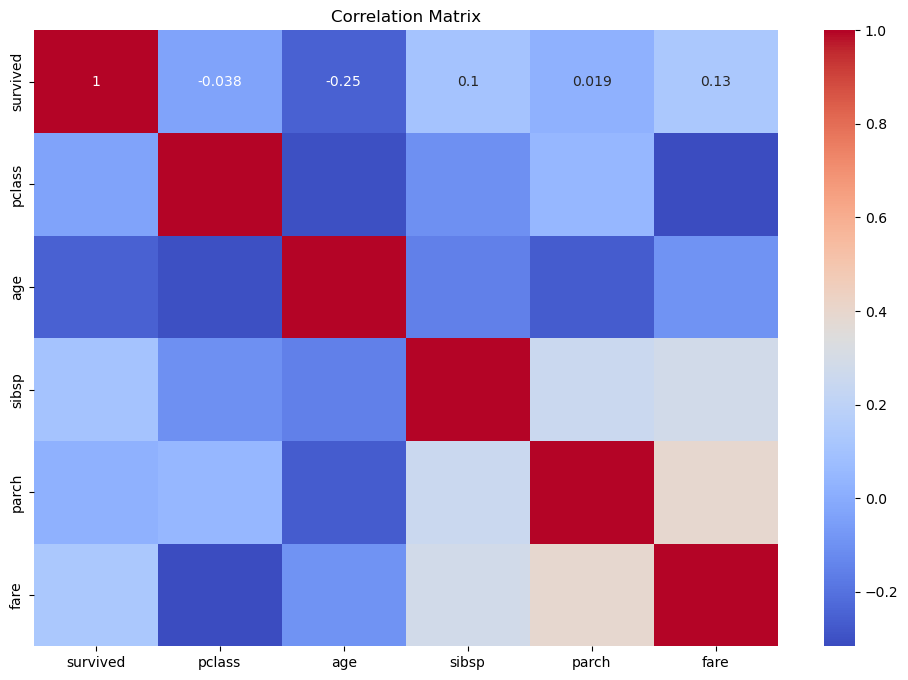

Selected Features: ['age']
         age
1   0.152082
3  -0.039875
6   1.175852
10 -2.023430
11  1.431795
    sibsp  parch  family_size
1       1      0            1
3       1      0            1
6       0      0            0
10      1      1            2
11      0      0            0
     1  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  1.0  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  1.0  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  1.0  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  1.0  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MedInc^2  ...  Population^2  Population AveOccup  \
0    -122.23  69.308955  ...      103684.0           822.888889   
1    -122.22  68.913242  ...     5764801.0          5065.730228   
2    -122.24  52.669855  ..

In [6]:
# Importing necessary libraries for all tasks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_california_housing

# Task 1: Feature Selection
# Load the dataset
df = sns.load_dataset('titanic').dropna()  # Using Titanic dataset and dropping missing values for simplicity

# Analyzing correlation between features and target variable
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Using mutual information to select important features
X = df.drop('survived', axis=1).select_dtypes(include=['float64', 'int64'])
y = df['survived']
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False)

# Documenting selected features based on mutual information
selected_features = mutual_info_series[mutual_info_series > 0.1].index.tolist()
print("Selected Features:", selected_features)

# Task 2: Feature Transformation
# Apply transformations such as log transformation, normalization, or standardization
# Load the dataset (using the same Titanic dataset)
df = sns.load_dataset('titanic').dropna()

# Applying standardization
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Displaying transformed features
print(df[selected_features].head())

# Task 3: Feature Creation
# Create new features by combining or modifying existing ones
# Load the dataset (using the same Titanic dataset)
df = sns.load_dataset('titanic').dropna()

# Creating new feature: family_size
df['family_size'] = df['sibsp'] + df['parch']

# Displaying the new feature
print(df[['sibsp', 'parch', 'family_size']].head())

# Task 4: Polynomial Features
# Generate polynomial features to capture non-linear relationships
# Load the California housing dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

# Using PolynomialFeatures to generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(california_df.drop('MedHouseVal', axis=1))
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(california_df.drop('MedHouseVal', axis=1).columns))

# Displaying polynomial features
print(X_poly_df.head())

# Task 5: Handling Categorical Features
# Convert categorical features into numerical features
# Load the Titanic dataset
df = sns.load_dataset('titanic').dropna()

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'])

# Displaying the encoded features
print(df_encoded.head())
